# Big Data (UBA) -  2024

## Trabajo Práctico 1

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 25 de octubre a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”.
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo m.n.romero91@gmail.com
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que:
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija.

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [27]:
# Instalamos librerias necesarias para todos los ejercicios del TP
# Ademas, incorporamos otras que quizas nos sirvan para futuras entregas

# importamos las librerias necesarias:
# request, json y time para manejar APIs
# pandas para los DataFrames
# matplotlib para hacer histogramas
# beautifulsoup para el ejercicio de web scrapping

import requests
import json
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
import locale
import datetime


In [28]:
# Resolver acá

# Definimos la direccion URL de la API de Mercado Libre. El producto de interes
# es "laptop". MLA es el codigo para la API de Mercado Libre Argentina
url_meli_laptop = 'https://api.mercadolibre.com/sites/MLA/search?q=laptop'

# Hacemos la solicitud a la API
response_meli_laptop = requests.get(url_meli_laptop)

# Verificamos mediante un loop si la solicitud fue exitosa (status_code = 200)
if response_meli_laptop.status_code == 200:
    # Necesitamos la respuesta en un formato JSON para su correcta manipulacion
    data_meli_laptop = response_meli_laptop.json()
    items_meli_laptop = data_meli_laptop['results']  # Extraemos los ítems de la consulta
    print(f"Se encontraron {len(items_meli_laptop)} ítems.") # Indica la cantidad de items encontrados

    # Por simplicidad, decidimos mostrar los primeros 5 ítems con información básica
    for laptop in items_meli_laptop[:5]:
        print(f"Laptop: {laptop['title']}")
        print(f"Precio: ${int(laptop['price']):,}".replace(",", "."))
        print(f"URL: {laptop['permalink']}")
        print('-' * 30)
else:
    print("Error en la solicitud:", response_meli_laptop.status_code)


Se encontraron 50 ítems.
Laptop: Notebook Samsung Galaxy Book3 Pro 14 Intel Core I5 12 Núcleos 16gb Color Graphite
Precio: $1.999.999
URL: https://www.mercadolibre.com.ar/notebook-samsung-galaxy-book3-pro-14-intel-core-i5-12-nucleos-16gb-color-graphite/p/MLA24848247#wid=MLA1459751602&sid=unknown
------------------------------
Laptop: Netbook Exomate X5-s1441p Intel N4020c 4gb Ssd128gb 11,6 W11 Color Gris
Precio: $329.999
URL: https://www.mercadolibre.com.ar/netbook-exomate-x5-s1441p-intel-n4020c-4gb-ssd128gb-116-w11-color-gris/p/MLA35101893#wid=MLA1848679454&sid=unknown
------------------------------
Laptop: Notebook Lenovo Ideapad 1 4gb 128gb 14 Intel Celeron W11 Color Plateado
Precio: $454.399
URL: https://www.mercadolibre.com.ar/notebook-lenovo-ideapad-1-4gb-128gb-14-intel-celeron-w11-color-plateado/p/MLA29590978#wid=MLA1852464206&sid=unknown
------------------------------
Laptop: Notebook Noblex N14x1010 14.1 Hd Intel Celeron 4gb/128gb Sdd
Precio: $389.999
URL: https://www.mercadol

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo.

In [29]:
# Resolver acá

# Creamos dos listas vacias para almacenar la información
# previamente obtenida de la consulta anterior

laptop = []
precio = []

# Extraemos el título de publicación de cada laptop
# junto a su precio

for item in items_meli_laptop:
      laptop.append(item['title'])
      precio.append(item['price'])

# Mediante la libreria pandas, creamos el dataframe correspondiente.

df_meli_laptop = pd.DataFrame({
        'Laptop': laptop,
        'Precio': precio
    })

# Calcular estadísticas: promedio, mínimo y máximo

precio_promedio_meli_laptop = df_meli_laptop['Precio'].mean()
precio_minimo_meli_laptop = df_meli_laptop['Precio'].min()
precio_maximo_meli_laptop = df_meli_laptop['Precio'].max()

print("\nEstadísticas de precios sobre las 50 laptops halladas en la consulta:")
print(f"Precio promedio: ${int(precio_promedio_meli_laptop):,}".replace(",", "."))
print(f"Precio mínimo: ${int(precio_minimo_meli_laptop):,}".replace(",", "."))
print(f"Precio máximo: ${int(precio_maximo_meli_laptop):,}".replace(",", "."))

df_meli_laptop


Estadísticas de precios sobre las 50 laptops halladas en la consulta:
Precio promedio: $948.249
Precio mínimo: $263.599
Precio máximo: $2.599.999


,Laptop,Precio
0,Notebook Samsung Galaxy Book3 Pro 14 Intel Cor...,1999999.00
1,Netbook Exomate X5-s1441p Intel N4020c 4gb Ssd...,329999.00
2,Notebook Lenovo Ideapad 1 4gb 128gb 14 Intel C...,454399.00
3,Notebook Noblex N14x1010 14.1 Hd Intel Celeron...,389999.00
4,"Notebook Asus Vivobook 14 Intel Core I3 1215u,...",719499.00
5,Notebook Acer Aspire Ryzen 7 5700u 16gb 512gb ...,1315303.00
6,"Notebook Hp Intel Core I3 N305, Ddr4 8gb Ram, ...",805999.00
7,Notebook Exo Smart T38 Intel N4020 4gb Ssd128g...,384999.00
8,Notebook Hp Pavilion 15-eg2529la Core I5 16gb ...,1149449.00
9,Notebook Lenovo Ideapad 1 15iau7 Pantalla Táct...,839999.00


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>?
Nota: pueden usar la librería de Matplotlib o la de Pandas.

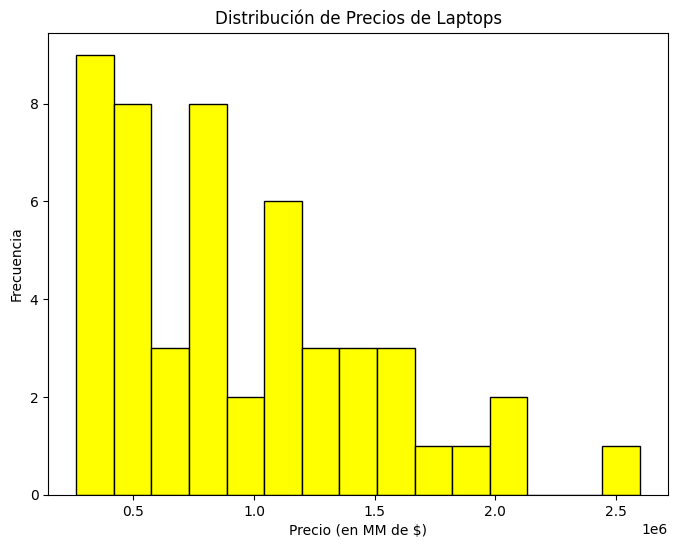

In [30]:
# Resolver acá

# Con la librearia Matplotlib, creamos un histograma de precios

plt.figure(figsize=(8,6))
plt.hist(df_meli_laptop['Precio'], bins=15, color='yellow', edgecolor='black')
plt.title('Distribución de Precios de Laptops')
plt.xlabel('Precio (en MM de $)')
plt.ylabel('Frecuencia')

plt.show()

# Los valores mayores a $2.000.000 parecen ser precios atipicos en la distribucion.
# A su vez, los valores menores al medio millon de pesos, son los que más frecuentes.

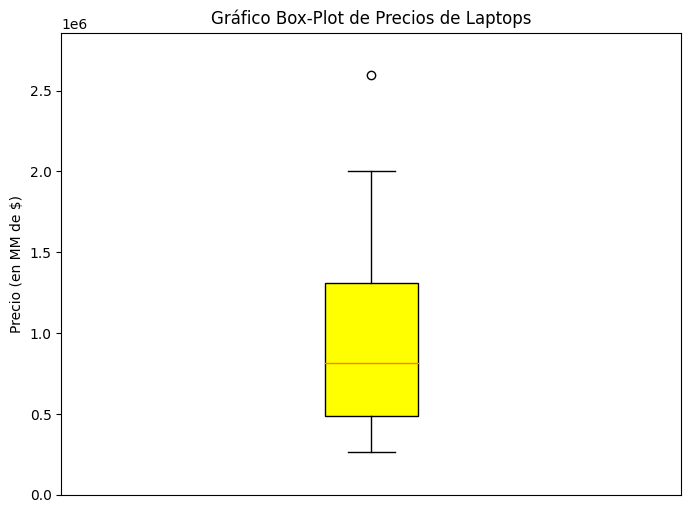

In [31]:
# Para confirmar el hallazgo de valores atípicos, adicionalmente se
# realiza el gráfico box-plot de los precios de laptops.
# En línea con el histograma anterior, se observa un dato
# que puede considerarse como outlier. El valor del outlier
# se encuentra alrededor de los $2.500.000.

plt.figure(figsize=(8,6))
plt.boxplot(df_meli_laptop['Precio'], patch_artist=True, boxprops=dict(facecolor='yellow'))
plt.title('Gráfico Box-Plot de Precios de Laptops')
plt.ylabel('Precio (en MM de $)')
plt.ylim(0, df_meli_laptop['Precio'].max() * 1.1)
plt.xticks([])
plt.show()


#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.)


Estadísticas de precios sobre los 50 smartphones Motorola:
Precio promedio Motorola: $510.646
Precio mínimo Motorola: $179.998
Precio máximo Motorola: $1.999.999

Productos que aceptan Mercado Pago: 48 de 48


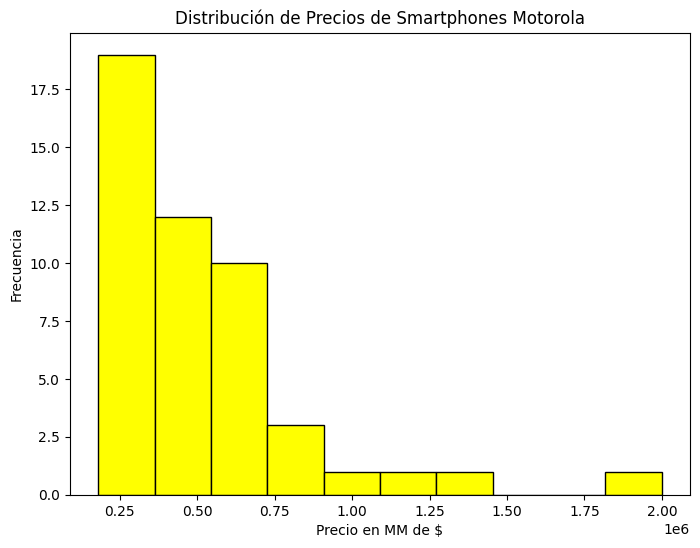


Estadísticas de precios sobre los 50 smartphones no Motorola hallados en la consulta::
Precio promedio no Motorola: $465.795
Precio mínimo no Motorola: $139.000
Precio máximo no Motorola: $1.399.000

Productos que aceptan Mercado Pago: 49 de 49


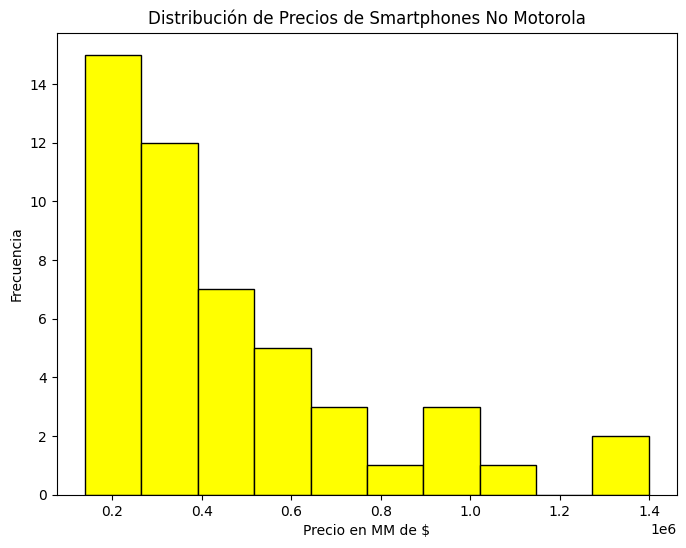

In [32]:
# Resolver acá

# Dado que Motorola es la marca que se posiciona cada vez más como líder en el
# mercado de celulares de Argentina. Mas especificamente, hace varios trimestres que
# casi la mitad del mercado le pertenece. Vamos a comparar entre celulares motorola
# y celulares no motorola en Mercado Libre. Los resultado hallados muestran:

#Conclusión 1:
## Distribución más homogánea es la de los smartphones que no pertenecenen a Motorola

#Conclusión 2:
## Distribución de precios de los celulares Motorola presentan una mayor concentración
## en la cola izquierda, es decir, esta compañía presenta más alternativas de
## celulares de menores precios

#Conclusión 3:
## Tanto los productos de Motorola como los no Motorola aceptan Mercado Pago

#Conclusión 4:
## Los precios promedio, inferior y superior de ambas distribuciones
# son relativamente similares

#_____________________________________________________________________________
# Repetimos los pasos de la consulta a la API de Mercado libre, pero esta vez
# para las primeras 50 apariciones de la categoría de "Celulares y Smartphones" (MLA1055)
# y solo celulares motorola

url_meli_smartphones_motorola = 'https://api.mercadolibre.com/sites/MLA/search?category=MLA1055&q=motorola&limit=50'

response_meli_smartphones_motorola = requests.get(url_meli_smartphones_motorola)

if response_meli_smartphones_motorola.status_code == 200:

    data_meli_smartphones_motorola = response_meli_smartphones_motorola.json()
    items_meli_smartphones_motorola = data_meli_smartphones_motorola['results']

    # Crear listas para almacenar la información
    smartphones_motorola = []
    prices_smartphones_motorola = []
    accepts_mercado_pago_smartphones_motorola = []

    # Extraer el título, precio y si acepta Mercado Pago de cada ítem
    for item in items_meli_smartphones_motorola:
        smartphones_motorola.append(item['title'])
        prices_smartphones_motorola.append(item['price'])
        accepts_mercado_pago_smartphones_motorola.append(item['accepts_mercadopago'])

    # Crear un DataFrame con pandas
    df_meli_smartphones_motorola = pd.DataFrame({
        'Smartphone': smartphones_motorola,
        'Precio': prices_smartphones_motorola,
        'Acepta Mercado Pago': accepts_mercado_pago_smartphones_motorola
    })


    # Calcular estadísticas de los precios
    precio_promedio_meli_smartphones_motorola = round(df_meli_smartphones_motorola['Precio'].mean(),0)
    precio_minimo_meli_smartphones_motorola = round(df_meli_smartphones_motorola['Precio'].min(),0)
    precio_maximo_meli_smartphones_motorola = round(df_meli_smartphones_motorola['Precio'].max(),0)

    print("\nEstadísticas de precios sobre los 50 smartphones Motorola:")
    print(f"Precio promedio Motorola: ${int(precio_promedio_meli_smartphones_motorola):,}".replace(",", "."))
    print(f"Precio mínimo Motorola: ${int(precio_minimo_meli_smartphones_motorola):,}".replace(",", "."))
    print(f"Precio máximo Motorola: ${int(precio_maximo_meli_smartphones_motorola):,}".replace(",", "."))


    # Verificar cuántos productos aceptan Mercado Pago
    motorola_con_mercado_pago = df_meli_smartphones_motorola['Acepta Mercado Pago'].sum()
    total_motorola = len(df_meli_smartphones_motorola)

    print(f"\nProductos que aceptan Mercado Pago: {motorola_con_mercado_pago} de {total_motorola}")

    # Crear un histograma de los precios usando matplotlib
    plt.figure(figsize=(8,6))
    plt.hist(df_meli_smartphones_motorola['Precio'], bins=10, color='yellow', edgecolor='black')
    plt.title('Distribución de Precios de Smartphones Motorola')
    plt.xlabel('Precio en MM de $')
    plt.ylabel('Frecuencia')

    # Mostrar el histograma
    plt.show()

else:
    print("Error en la solicitud:", response_meli_smartphones_motorola.status_code)



# Consulta para smartphones que no sean Motorola

url_meli_smartphones_no_moto = 'https://api.mercadolibre.com/sites/MLA/search?category=MLA1055&q=NOT+motorola&limit=50'

response_meli_smartphones_no_moto = requests.get(url_meli_smartphones_no_moto)

if response_meli_smartphones_no_moto.status_code == 200:

    data_meli_smartphones_no_moto = response_meli_smartphones_no_moto.json()
    items_meli_smartphones_no_moto = data_meli_smartphones_no_moto['results']

 # Crear listas para almacenar la información
    smartphones_no_moto = []
    prices_smartphones_no_moto = []
    accepts_mercado_pago_smartphones_no_moto = []

    # Extraer el título, precio y si acepta Mercado Pago de cada ítem
    for item in items_meli_smartphones_no_moto:
        smartphones_no_moto.append(item['title'])
        prices_smartphones_no_moto.append(item['price'])
        accepts_mercado_pago_smartphones_no_moto.append(item['accepts_mercadopago'])

    # Crear un DataFrame con pandas
    df_meli_smartphones_no_moto = pd.DataFrame({
        'Smartphone': smartphones_no_moto,
        'Precio': prices_smartphones_no_moto,
        'Acepta Mercado Pago': accepts_mercado_pago_smartphones_no_moto
    })

    # Calcular estadísticas de los precios
    precio_promedio_meli_smartphones_motorola_no_moto = round(df_meli_smartphones_no_moto['Precio'].mean(),0)
    precio_minimo_meli_smartphones_motorola_no_moto = round(df_meli_smartphones_no_moto['Precio'].min(),0)
    precio_maximo_meli_smartphones_motorola_no_moto = round(df_meli_smartphones_no_moto['Precio'].max(),0)

    print("\nEstadísticas de precios sobre los 50 smartphones no Motorola hallados en la consulta::")
    print(f"Precio promedio no Motorola: ${int(precio_promedio_meli_smartphones_motorola_no_moto):,}".replace(",", "."))
    print(f"Precio mínimo no Motorola: ${int(precio_minimo_meli_smartphones_motorola_no_moto):,}".replace(",", "."))
    print(f"Precio máximo no Motorola: ${int(precio_maximo_meli_smartphones_motorola_no_moto):,}".replace(",", "."))

    # Verificar cuántos productos aceptan Mercado Pago
    no_motorola_con_mercado_pago = df_meli_smartphones_no_moto['Acepta Mercado Pago'].sum()
    total_no_motorola = len(df_meli_smartphones_no_moto)

    print(f"\nProductos que aceptan Mercado Pago: {no_motorola_con_mercado_pago} de {total_no_motorola}")

 # Crear un histograma de los precios usando matplotlib
    hist_no_moto=plt.figure(figsize=(8,6))
    hist_no_moto=plt.hist(df_meli_smartphones_no_moto['Precio'], bins=10, color='yellow', edgecolor='black')
    hist_no_moto=plt.title('Distribución de Precios de Smartphones No Motorola')
    hist_no_moto=plt.xlabel('Precio en MM de $')
    hist_no_moto=plt.ylabel('Frecuencia')

    # Mostrar el histograma
    hist_no_moto

else:
    print("Error en la solicitud:", response_meli_smartphones_motorola.status_code)


### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [33]:
# Resolver acá

# Definir la URL de la portada de La Nación
url_la_nacion = 'https://www.lanacion.com.ar/'

# Hacer la solicitud HTTP
response_la_nacion = requests.get(url_la_nacion)

# Verificar si la solicitud fue exitosa
if response_la_nacion.status_code == 200:
    # Parsear el contenido HTML de la página
    soup = BeautifulSoup(response_la_nacion.content, 'html.parser')

    # Extraer todos los enlaces (tags <a>)
    links = soup.find_all('a', href=True)

    news_links = []

# Recorrer todos los enlaces y filtrar solo los que contienen "-nid".
# NID es un codigo para identificar articulos en gestion de contenidos: un patron
# en comun para todas las publicaciones.

    for link in links:
        href = link['href']

        # Verificar si el enlace contiene "-nid"
        if "-nid" in href:
            if href.startswith('/'):
                # Concatenar el dominio para formar un link completo
                full_link = 'https://www.lanacion.com.ar' + href
                news_links.append(full_link)
            elif href.startswith('https://www.lanacion.com.ar'):
                # Ya es un link completo
                news_links.append(href)

    # Eliminar duplicados en la lista
    news_links = list(set(news_links))

    # Crear un DataFrame con los links
    df_portada_la_nacion = pd.DataFrame(news_links, columns=['Link de la noticia'])

    # Agregar una columna con la fecha y hora en que se obtuvieron los datos
    df_portada_la_nacion['Fecha y Hora'] = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')

    # Exportar el DataFrame a un archivo Excel
    df_portada_la_nacion.to_excel('noticias_lanacion.xlsx', index=False, engine='openpyxl')

    print("\nEl archivo Excel ha sido exportado exitosamente.")
else:
    print(f"Error en la solicitud. Código de estado: {response_la_nacion.status_code}")




El archivo Excel ha sido exportado exitosamente.
